### Guided Practice: Logit Function and Odds

In [15]:
!pwd

/Users/etown/Desktop/eperry/lessons/lesson-09/code/starter-code


In [11]:
import pandas as pd
import numpy as np 

In [13]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [14]:
for odds in odds_set:
    print sigmoid_func(logit_func(odds))
    

# can also write:
#for odds in odds_set:
    # log_odds = logit_func(odds)
    # print sigmoid_func(log_odds) 

0.833333333333
0.952380952381
0.52380952381
0.642857142857
0.615384615385


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [50]:
lm = LogisticRegression()

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv') 

In [51]:
df.head()

# admit = categorical
# gre = integer / continuous
# gpa = continuous / discreet (best answer) 
# rank = ordinal

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [52]:
# other option
# dummies = pd.get_dummies(df['rank'])
# df = df.join(dummies)


df = df.join(pd.get_dummies(df['rank'])) 

In [53]:
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [54]:
# slicing dataframe
# only keeping gre and gpa
# dummy variables minus 1
# df.admit is the target column

lm.fit(df[['gre', 'gpa', 1, 2, 3,]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
from sklearn.cross_validation import train_test_split
X = df[["gre", "gpa", 1, 2, 3]] 
y = df.admit 

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=42)

In [84]:
type(X_train)

pandas.core.frame.DataFrame

In [85]:
# fit on the train data
# predict on the test data

lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
actuals = lm.predict(X_test)
print actuals
probas = lm.predict_proba(X_test)


print probas[:,1] #positive probabilities only (1 class)  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[ 0.38204407  0.41325391  0.24636586  0.28924028  0.36120666  0.19604745
  0.24091967  0.39440836  0.25864709  0.468729    0.41996108  0.4553272
  0.19320964  0.25143336  0.37835437  0.37277756  0.26925496  0.39417466
  0.20029244  0.41460857  0.24636586  0.18975541  0.4109778   0.19423376
  0.18215678  0.18957489  0.23065815  0.22134677  0.18846481  0.41363362
  0.40809077  0.24296583  0.34451611  0.16704585  0.34224347  0.35519995
  0.45627386  0.27132029  0.39627983  0.2887175   0.37444945  0.23790823
  0.19739281  0.51179377  0.3393853   0.37518327  0.42163214  0.26915878
  0.25198628  0.41998486  0.38056653  0.36342251  0.44409063  0.22426146
  0.38878948  0.17655398  0.23128389  0.21556602  0.27213364  0.40953351
  0.23177145  0.40795034  

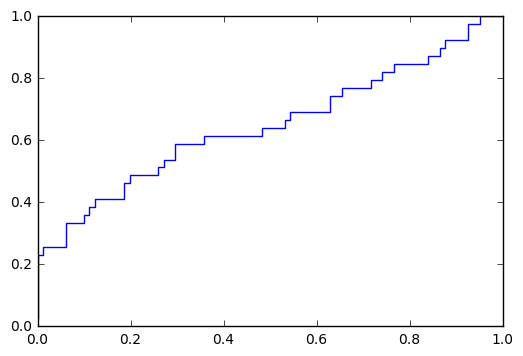

In [96]:
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1])

In [97]:
# Just above 50 percent. Not much better than a random guess (50%) 

roc_auc_score(y_test, lm.predict(X_test))

0.53846153846153844

In [103]:
np.array(probas[:,1])

array([ 0.38204407,  0.41325391,  0.24636586,  0.28924028,  0.36120666,
        0.19604745,  0.24091967,  0.39440836,  0.25864709,  0.468729  ,
        0.41996108,  0.4553272 ,  0.19320964,  0.25143336,  0.37835437,
        0.37277756,  0.26925496,  0.39417466,  0.20029244,  0.41460857,
        0.24636586,  0.18975541,  0.4109778 ,  0.19423376,  0.18215678,
        0.18957489,  0.23065815,  0.22134677,  0.18846481,  0.41363362,
        0.40809077,  0.24296583,  0.34451611,  0.16704585,  0.34224347,
        0.35519995,  0.45627386,  0.27132029,  0.39627983,  0.2887175 ,
        0.37444945,  0.23790823,  0.19739281,  0.51179377,  0.3393853 ,
        0.37518327,  0.42163214,  0.26915878,  0.25198628,  0.41998486,
        0.38056653,  0.36342251,  0.44409063,  0.22426146,  0.38878948,
        0.17655398,  0.23128389,  0.21556602,  0.27213364,  0.40953351,
        0.23177145,  0.40795034,  0.20705347,  0.44100042,  0.20514802,
        0.2225974 ,  0.19389702,  0.39883459,  0.2008731 ,  0.40

In [109]:
predictionDF = pd.DataFrame({"actual" : y_test, "predicted" : np.array(probas[:,1])})
predictionDF

threshold = 0 
while threshold is <= 1:
    columnName = "predicted_class_{}".format(threshold)
    predictionDF[columnName] = predictionDF.predicted.apply(
        lambda prob: 1 if prob >= threshold else 0)
    print pd.crosstab(predictionDF.actual,predictionDF[columnName])

ValueError: array length 120 does not match index length 121

In [98]:
y_test["predicted_probability"] = probas 
y_test.head() 

209    0
280    0
33     1
210    0
93     0
Name: admit, dtype: object

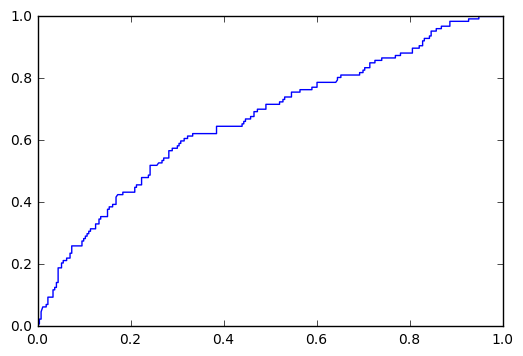

In [80]:
#my random trials

actuals = lm.predict(X) 
probas = lm.predict_proba(X)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

In [74]:
import numpy as np

In [87]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[  7.68209555e-04   1.56578219e-01   8.50062915e-01   5.16056542e-01
   -3.68446891e-01]]
[-1.99052301]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [89]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

NameError: name 'feature_set' is not defined

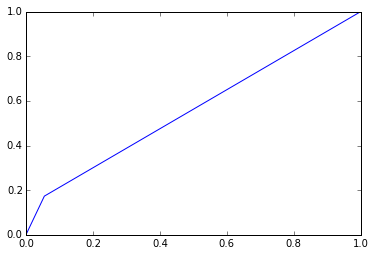

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [72]:
roc_auc_score(df['admit'], lm.predict(feature_set)

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).